In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sweetviz as sz

## Reading the dataset into a dataframe.

In [2]:
data = pd.read_excel("customer_churn_large_dataset.xlsx")
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,99996.0,Customer_99996,33.0,Male,Houston,23.0,55.13,226.0,1.0
99996,99997.0,Customer_99997,62.0,Female,New York,19.0,61.65,351.0,0.0
99997,99998.0,Customer_99998,64.0,Male,Chicago,17.0,96.11,251.0,1.0
99998,99999.0,Customer_99999,51.0,Female,New York,20.0,49.25,434.0,1.0


## Making a copy of the dataset in order to avoid changes in the original dataset


In [3]:
data1 = data.copy()
data1

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,99996.0,Customer_99996,33.0,Male,Houston,23.0,55.13,226.0,1.0
99996,99997.0,Customer_99997,62.0,Female,New York,19.0,61.65,351.0,0.0
99997,99998.0,Customer_99998,64.0,Male,Chicago,17.0,96.11,251.0,1.0
99998,99999.0,Customer_99999,51.0,Female,New York,20.0,49.25,434.0,1.0


## Checking for null values in the dataset.

In [4]:
data1.isna()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [5]:
data1.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

## Checking various properties of the dataset.

In [6]:
data1.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB


In [8]:
data1.describe

<bound method NDFrame.describe of        CustomerID             Name   Age  Gender     Location  \
0             1.0       Customer_1  63.0    Male  Los Angeles   
1             2.0       Customer_2  62.0  Female     New York   
2             3.0       Customer_3  24.0  Female  Los Angeles   
3             4.0       Customer_4  36.0  Female        Miami   
4             5.0       Customer_5  46.0  Female        Miami   
...           ...              ...   ...     ...          ...   
99995     99996.0   Customer_99996  33.0    Male      Houston   
99996     99997.0   Customer_99997  62.0  Female     New York   
99997     99998.0   Customer_99998  64.0    Male      Chicago   
99998     99999.0   Customer_99999  51.0  Female     New York   
99999    100000.0  Customer_100000  27.0  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                            17.0         73.36           236.0    0.0  
1                             1.0      

## Visualising the data through a pairplot using the seaborn library 

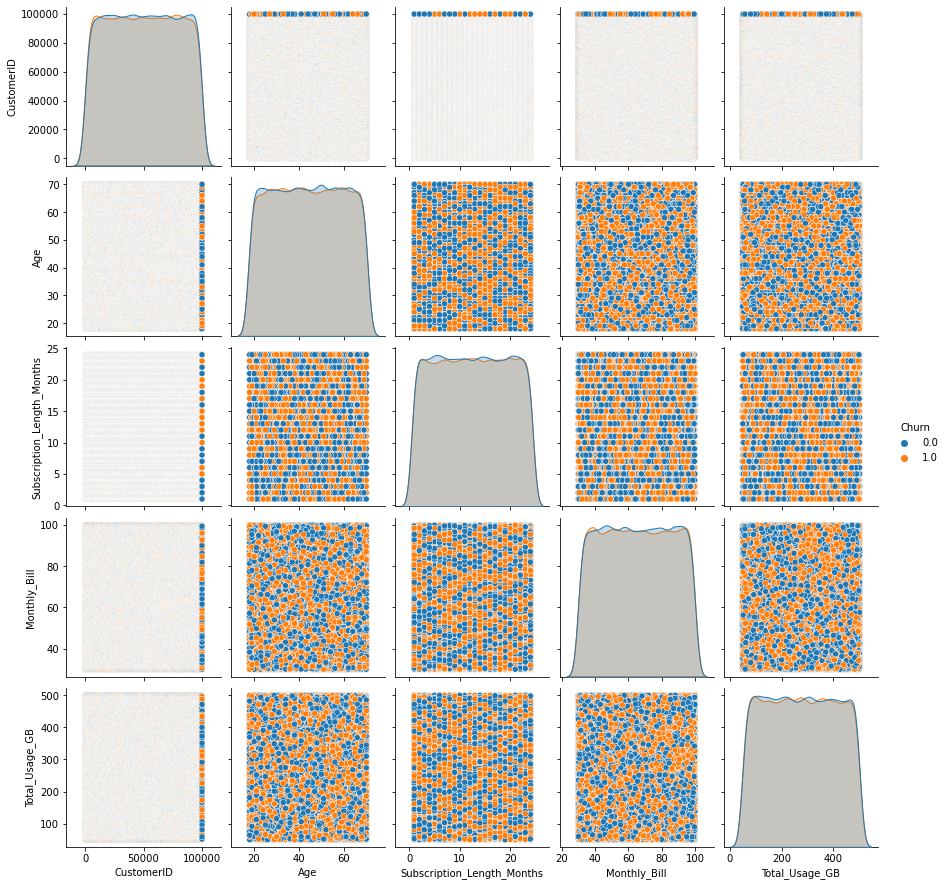

In [9]:
sns.pairplot(data1,hue="Churn")

In [10]:
data1.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


## Plotting a pie chart to see the amount of customers (in percentage) that have churned

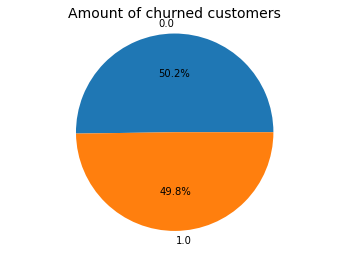

In [11]:
target = data1["Churn"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()


Thus here we can see that nearly 49.8 % customers have churned

## Checking the amount of customers distributed across various age groups

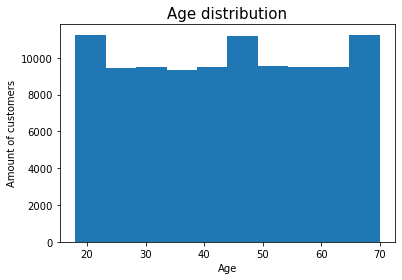

In [12]:
data1["Age"].hist(grid=False)
plt.xlabel("Age")
plt.ylabel("Amount of customers")
plt.title("Age distribution", fontsize=15)
plt.show()

Thus, here we can see that maximum number of customers belong to th age groups 0-20/22 , 40-50 and 65-70 years old

## Plotting the distribution of customers across various age groups in order to get a detailed insight

/Users/vanshjulka18/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

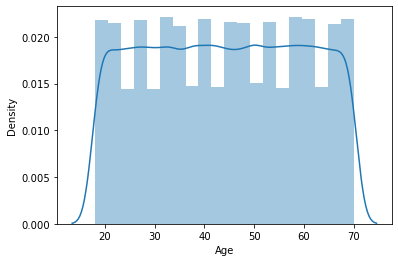

In [13]:
sns.distplot(data1['Age'],bins = 20)

In [14]:
data1.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


## Encoding the categorical variables like Gender and Locations of customers using Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['Gender']=le.fit_transform(data1['Gender'])
data1['Location']=le.fit_transform(data1['Location'])
data1.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,1,2,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,0,4,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,0,2,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,0,3,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,0,3,19.0,58.14,266.0,0.0


## Removing irrelevant features from the dataset

In [16]:
x = data1[['Age','Gender','Location','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Churn']]
x

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63.0,1,2,17.0,73.36,236.0,0.0
1,62.0,0,4,1.0,48.76,172.0,0.0
2,24.0,0,2,5.0,85.47,460.0,0.0
3,36.0,0,3,3.0,97.94,297.0,1.0
4,46.0,0,3,19.0,58.14,266.0,0.0
...,...,...,...,...,...,...,...
99995,33.0,1,1,23.0,55.13,226.0,1.0
99996,62.0,0,4,19.0,61.65,351.0,0.0
99997,64.0,1,0,17.0,96.11,251.0,1.0
99998,51.0,0,4,20.0,49.25,434.0,1.0


## Plotting the correlation of features of the dataset 

<AxesSubplot:>

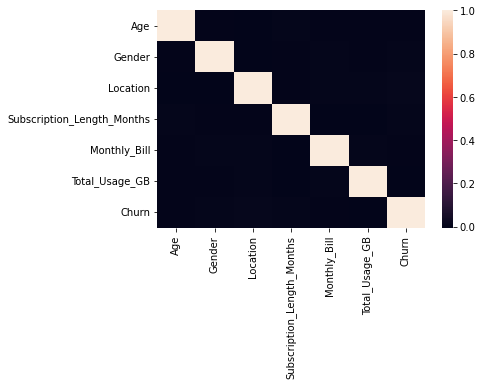

In [17]:
sns.heatmap(x.corr())

Here we can see that the data is highly correlated.

## Importing various classifiers in order to check which ones generalise better on the data set 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score
import sklearn.preprocessing as skl

## Feature Engineering and scaling of data 

In [19]:
X = data1[['Age','Subscription_Length_Months','Location','Monthly_Bill']]
y = data1[['Churn']]
sc=skl.StandardScaler()
X=sc.fit_transform(X)

## Checking How Various Classifiers Genralise to the data after feature engineering

In [20]:
Random_model = RandomForestClassifier()
Random_model.fit(X,y)
print("Random Forest Classifier accuracy: ", (Random_model.score(X,y))*100)

xgb_model = XGBClassifier(n_estimators=390, learning_rate=0.1)
xgb_model.fit(X,y)
print("XGBoost Classifier accuracy: ", (xgb_model.score(X,y))*100)

knn_model = KNeighborsClassifier()
knn_model.fit(X,y)
print("KNN Classifier accuracy", (knn_model.score(X,y))*100)

NB_model = GaussianNB()
NB_model.fit(X,y)
print("Gaussion Navie Bayes accuracy: " ,(NB_model.score(X,y))*100)

decision_model = DecisionTreeClassifier()
decision_model.fit(X,y)
print("Decision Tree Classifier accuracy: ", (decision_model.score(X,y))*100)


/var/folders/_c/_vx6sphn1m76py3b5mx1jh340000gn/T/ipykernel_16769/1406832795.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Random_model.fit(X,y)


Random Forest Classifier accuracy:  99.935
XGBoost Classifier accuracy:  65.257


/Users/vanshjulka18/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Classifier accuracy 68.881
Gaussion Navie Bayes accuracy:  50.464


/Users/vanshjulka18/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Classifier accuracy:  99.935


As it can be seen clearly, Random Forest and Decision Trees have the highest score of generalisation for the given set of predictors

## Splitting the data into trainig and testing sets and building the model to make predictions

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)
y_pred=Random_model.predict(X_test)
y_pred

array([0., 0., 1., ..., 1., 1., 1.])

## Evaluating the model efficiency by computing teh accuracy of the model 

In [22]:
from sklearn.metrics import accuracy_score
print("accuracy of the model Random Forest: ", accuracy_score(y_test, Random_model.predict(X_test))*100)

accuracy of the model Random Forest:  99.928


## Further evaluation of model using different evaluation metrics like precision, recall, r2 score and confusion matrix 

In [23]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)*100
score

99.71199985070072

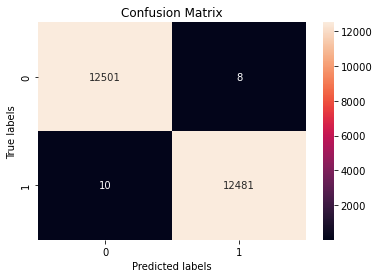

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [25]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.9993594363039475, 0.9991994235849812, 0.9992794235388311, None)

## Plotting the Precision-Recall Curve

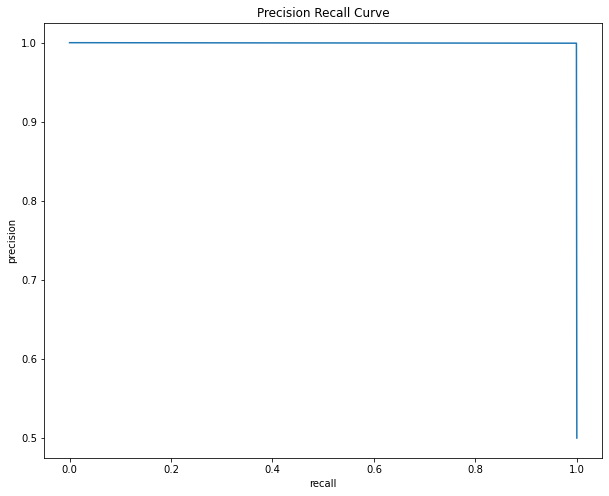

In [26]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize = (10,8))
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

## Testing the dataset on the Desicion Tree model 

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)
y_pred=decision_model.predict(X_test)
y_pred

array([0., 0., 1., ..., 1., 1., 1.])

## Evaluating the accuracy of the decision tree model using accuracy score

In [28]:
from sklearn.metrics import accuracy_score
print("accuracy of the model using Decision Tree: ", accuracy_score(y_test, decision_model.predict(X_test))*100)

accuracy of the model using Decision Tree:  99.932


## ACCURACY:

### Random Forest Model: 99.928 %
### Decision Tree Model : 99.932 %